# Loan Application Status Prediction
Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [11]:
import pandas as pd
import numpy as np

#importing ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#importing feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

#importing train-test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#importing metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#importing Machine Learning models
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv(r"C:\Users\KARTIK NEGI\Desktop\loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
df.shape

(614, 13)

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
df.set_index('Loan_ID',inplace=True)

In [18]:
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
df.shape

(614, 12)

In [20]:
print(df.columns)
print(df.dtypes)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [21]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [22]:
for i in df.columns:
    print(df[i].value_counts())
    print(df[i].nunique())
    print("\n")

Male      489
Female    112
Name: Gender, dtype: int64
2


Yes    398
No     213
Name: Married, dtype: int64
2


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
4


Graduate        480
Not Graduate    134
Name: Education, dtype: int64
2


No     500
Yes     82
Name: Self_Employed, dtype: int64
2


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
505


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
287


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
203


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.

In [23]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# OBSERVATIONS:-

1) We have 12 columns out of which eleven(11) are features and one(1) is a target variable which is called "Loan_Status". After using graphical analysis we will also drop some unnecessary features as well.

2) By using unique and value_counts we have come to a conclusion that features like "Gender","Married ","Dependents "," Education"," Self_Employed"," Property_Area" are categorical in nature and features like applicantincome,coapplicantIncome,Loanamount,Credit_history are continuos in nature which comes under quantitative data and some features like "Loan_amount_term" and "Credit_history" have discrete data which is a form of quantitative data.

3) The Target Variable "Loan_Status" is a categorical data so will be using classification models for building this project model.




             
               
            
             




### CHECKING FOR NULL VALUES IN OUR TARGET

In [24]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [25]:
df.loc[df["Loan_Status"]==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,


In [26]:
df.loc[df["ApplicantIncome"]==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,


## Atleast we dont have any missing value in our target variable

In [27]:
print(df.isnull().sum())
print(df.dtypes)


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [28]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
# filling numerical data columns with the mean value of that column
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

# filling object data columns with the mode value of that column
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Status'] = df['Loan_Status'].fillna(df['Loan_Status'].mode()[0])

In [30]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# we have filled the null and empty values from the dataset.
    

In [31]:
# Let check numerical and object datatype columns after dropping and filling all data:
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print(f"Object Data Type Columns are: ", categorical_col)

Object Data Type Columns are:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [32]:
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
print(f"Numerical Data Type Columns: ", numerical_col)

Numerical Data Type Columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# Statistical analysis for Numerical Columns:-

In [33]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [34]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [35]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


# DATA VISUALIZATION

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# UNI-VARIATE ANALYSIS:-

## CHECKING THE DISTRIBUTION PLOTS OF ALL CATEGORICAL COLUMNS

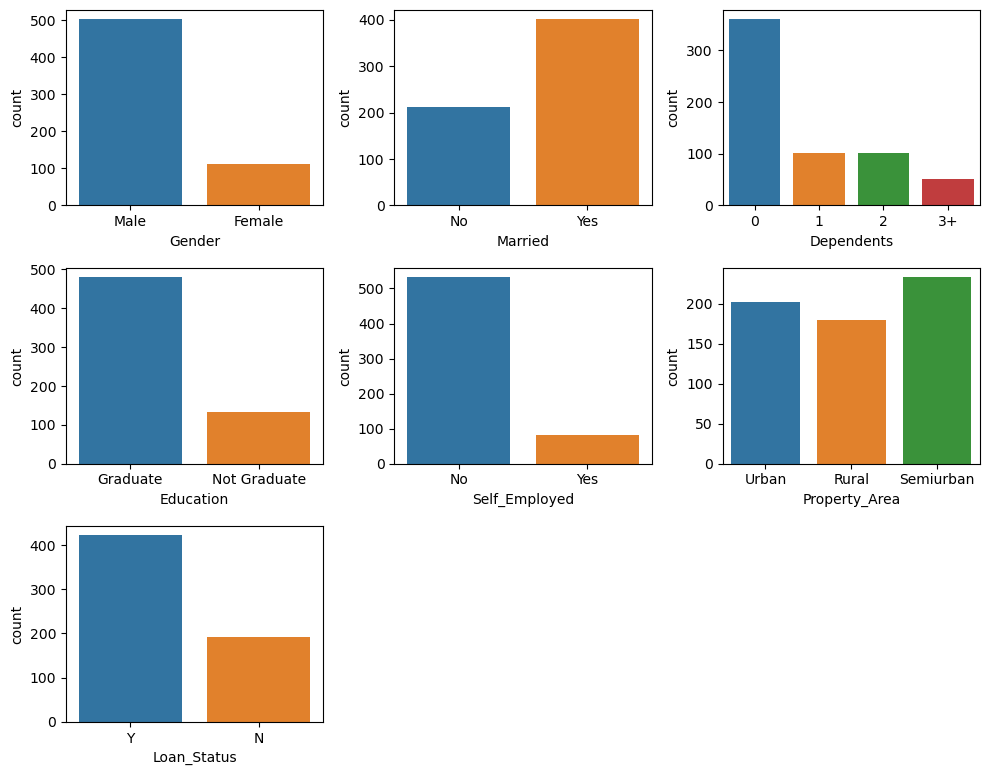

In [36]:
plt.figure(figsize=(10,10))
plot_number=1
for col in categorical_col:
    if plot_number<=7:
        ax=plt.subplot(4,3,plot_number)
        sns.countplot(df[col])
        
    plot_number+=1
plt.tight_layout()

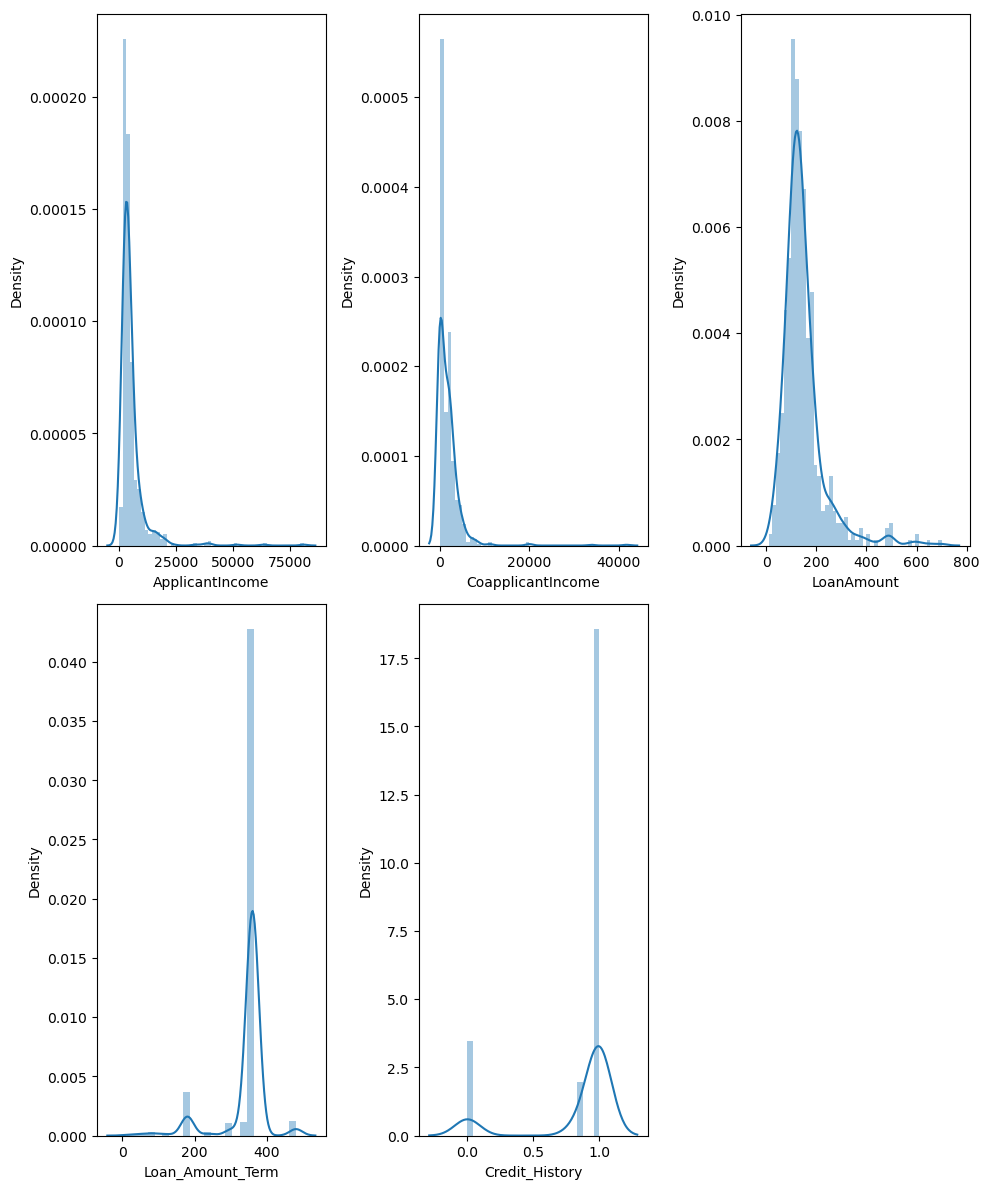

In [37]:
plt.figure(figsize=(10,12))
plot_number=1
for col in numerical_col:
    if plot_number<=5:
        ax=plt.subplot(2,3,plot_number)
        sns.distplot(df[col])
        
    plot_number+=1
plt.tight_layout()

In [38]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

# We have a very high skewness in some of the features as shown by the graph above. we will remove them after the other observation done through visualization.

# BI-VARIATE ANALYSIS

In [39]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


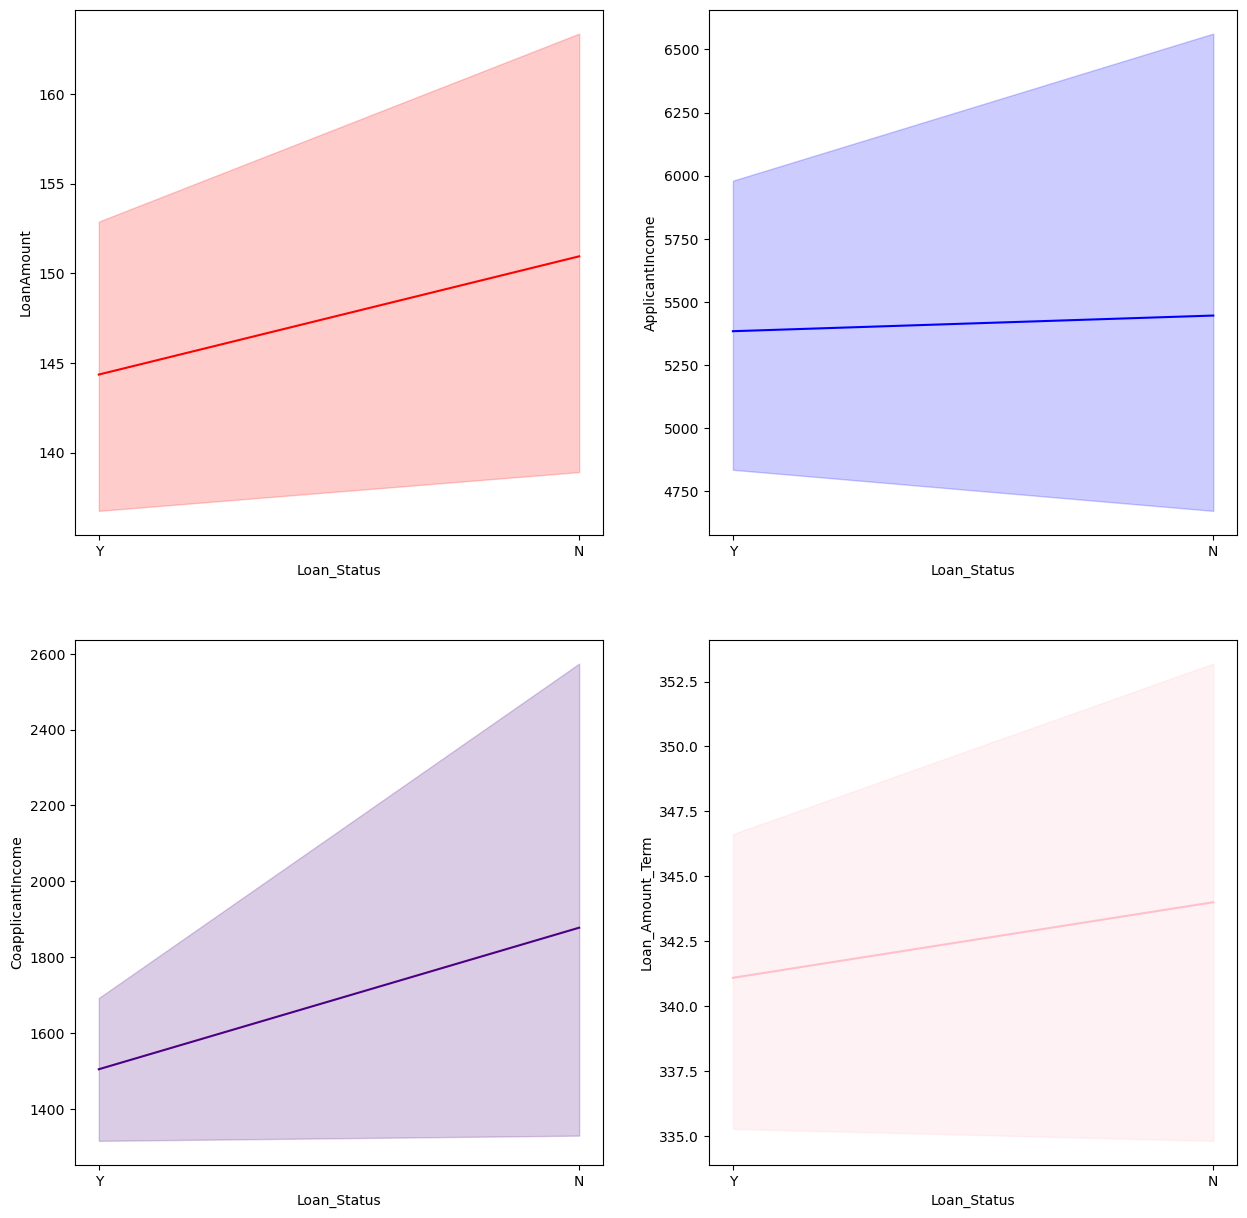

In [40]:
fig,axes=plt.subplots(2,2,figsize=(15,15))

# Checking loanamount with respect to Loan_Status
sns.lineplot(x='Loan_Status',y='LoanAmount',ax=axes[0,0],data=df,color="r")

# Checking ApplicantIncome with respect to Loan_Status
sns.lineplot(x='Loan_Status',y='ApplicantIncome',ax=axes[0,1],data=df,color="b")

# Checking CoapplicantIncome with respect to Loan_Status
sns.lineplot(x='Loan_Status',y='CoapplicantIncome',ax=axes[1,0],data=df,color="indigo")

# Checking Loan_amount_term with respect to Loan_Status
sns.lineplot(x='Loan_Status',y='Loan_Amount_Term',ax=axes[1,1],data=df,color="pink")
plt.show()

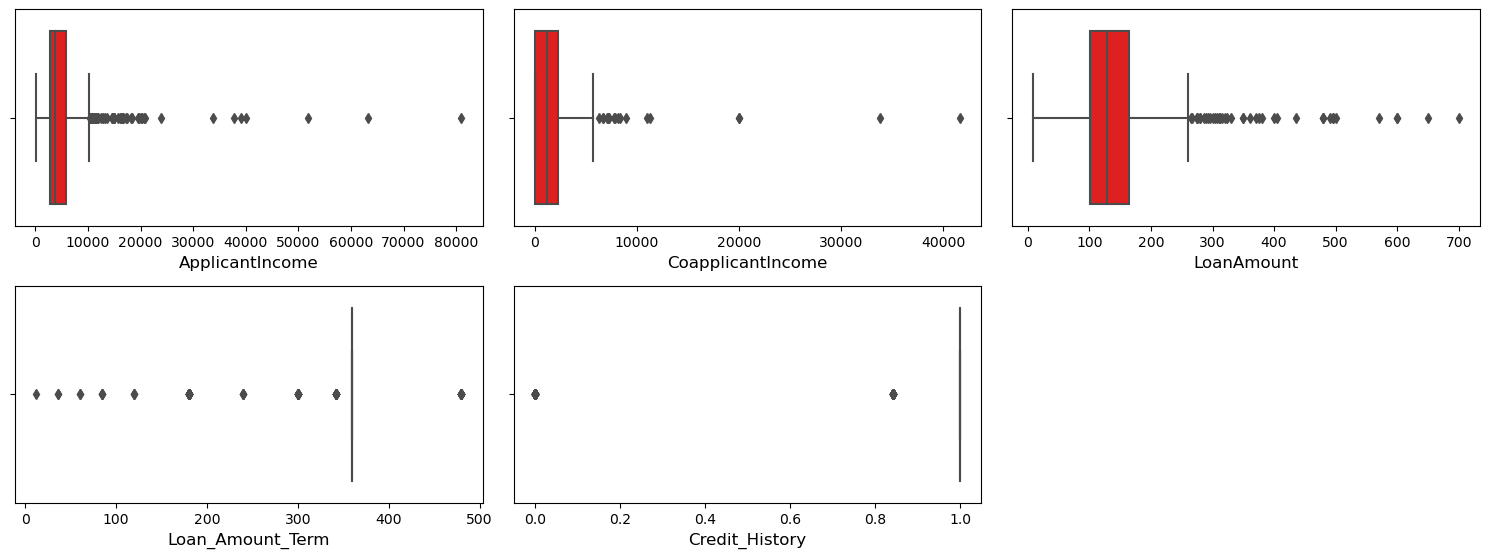

In [41]:
plt.figure(figsize=(15,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="red")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [45]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### As through graphical and non graphical analysis the data seems to have a lot of outliers that should be treated as well.


## USING Z SCORE METHOD TO REMOVE THE OUTLIERS PRESENT IN THE DATA

In [46]:
# Features containing outliers
features = df[['ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']]

# Using zscore to remove outliers

z=np.abs(zscore(features))

z

,ApplicantIncome,Credit_History,Loan_Amount_Term,LoanAmount,CoapplicantIncome
Loan_ID,,,,,
LP001002,0.072991,0.451640,0.279851,0.000000,0.554487
LP001003,0.134412,0.451640,0.279851,0.219273,0.038732
LP001005,0.393747,0.451640,0.279851,0.957641,0.554487
LP001006,0.462062,0.451640,0.279851,0.314547,0.251980
LP001008,0.097728,0.451640,0.279851,0.064454,0.554487
...,...,...,...,...,...
LP002978,0.410130,0.451640,0.279851,0.898095,0.554487
LP002979,0.212557,0.451640,2.518655,1.267279,0.554487
LP002983,0.437174,0.451640,0.279851,1.269371,0.472404


In [47]:
# Creating new dataframe
df1 = df[(z<3).all(axis=1)] 
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y


In [48]:
df1.shape

(577, 12)

In [49]:
df.shape

(614, 12)

## USING THE ORDINAL ENCODER TO CONVERT THE CATEGORICAL DATA INTO NUMERICAL DATA FOR THE MODELLING ALGORITHMS TO TAKE PLACE.

In [50]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [51]:
df.shape

(614, 12)

In [52]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = oe.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] = oe.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Self_Employed'] = oe.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area'] = oe.fit_transform(df['Property_Area'].values.reshape(-1,1))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,Y
LP001003,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,N
LP001005,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,Y
LP001006,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,Y
LP001008,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,Y


In [53]:
df.tail(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002984,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,Y
LP002990,0.0,0.0,0.0,0.0,1.0,4583,0.0,133.0,360.0,0.0,1.0,N


In [54]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
dtype: float64

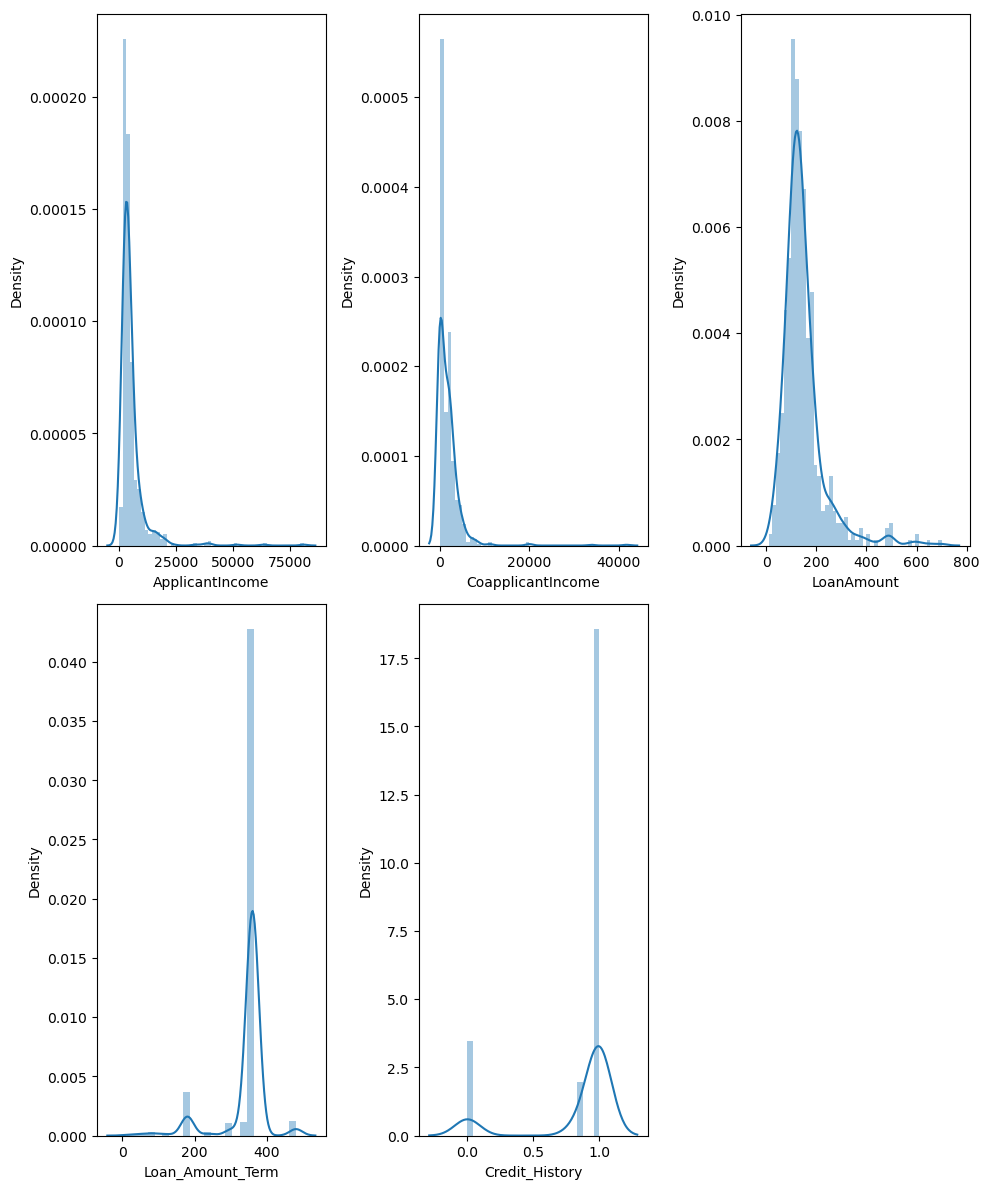

In [55]:
plt.figure(figsize=(10,12))
plot_number=1
for col in numerical_col:
    if plot_number<=5:
        ax=plt.subplot(2,3,plot_number)
        sns.distplot(df[col])
        
    plot_number+=1
plt.tight_layout()

In [56]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
dtype: float64

In [87]:
## WE HAVE TO REMOVE THE SKEWNESS FROM SOME FEATURES

# APPLYING THE CUBEROOT METHOD TO REMOVE THE SKEWNESS

In [61]:
df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])
df.skew()


Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.083638
CoapplicantIncome   -0.219081
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
dtype: float64

In [63]:
df['ApplicantIncome']=np.cbrt(df['ApplicantIncome'])

In [65]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.669805
CoapplicantIncome   -0.219081
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
dtype: float64

## Now the skewness has been treated 

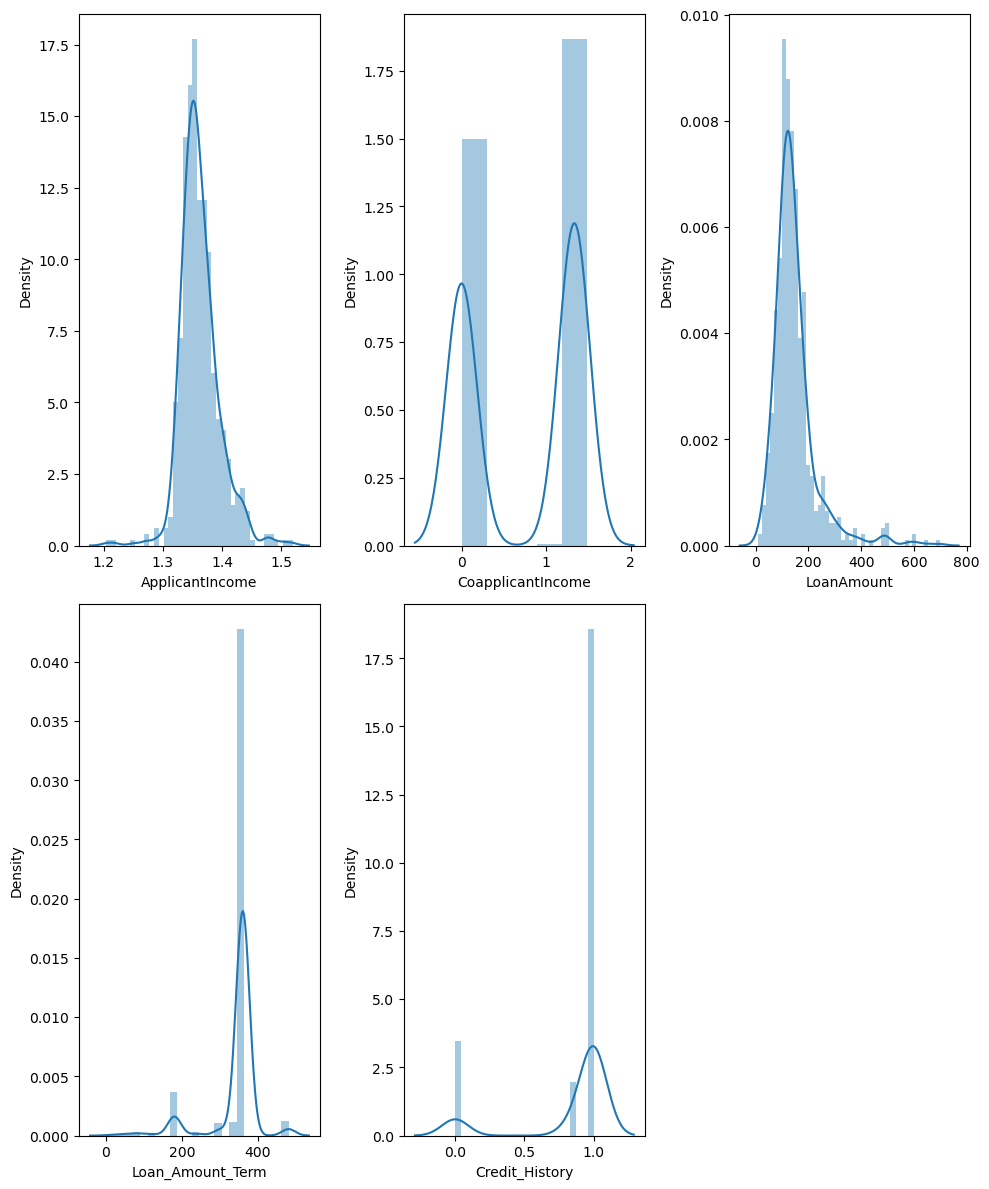

In [66]:
plt.figure(figsize=(10,12))
plot_number=1
for col in numerical_col:
    if plot_number<=5:
        ax=plt.subplot(2,3,plot_number)
        sns.distplot(df[col])
        
    plot_number+=1
plt.tight_layout()

In [67]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.083478,0.222253,0.107930,-0.073567,0.012819,-0.025752
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.023005,0.328681,0.147141,-0.100863,0.005852,0.004257
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.117028,0.004960,0.163106,-0.101054,-0.037392,-0.000244
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.182550,0.055266,-0.166998,-0.077242,-0.077936,-0.065243
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.190851,-0.099071,0.115260,-0.033943,-0.002260,-0.030860
ApplicantIncome,0.083478,0.023005,0.117028,-0.182550,0.190851,1.000000,-0.371863,0.559280,-0.031124,0.019207,-0.029309
CoapplicantIncome,0.222253,0.328681,0.004960,0.055266,-0.099071,-0.371863,1.000000,0.023734,0.019136,0.006889,-0.053855
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.559280,0.023734,1.000000,0.038801,-0.007738,-0.044776
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.031124,0.019136,0.038801,1.000000,0.001395,-0.077620
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,0.019207,0.006889,-0.007738,0.001395,1.000000,-0.001880


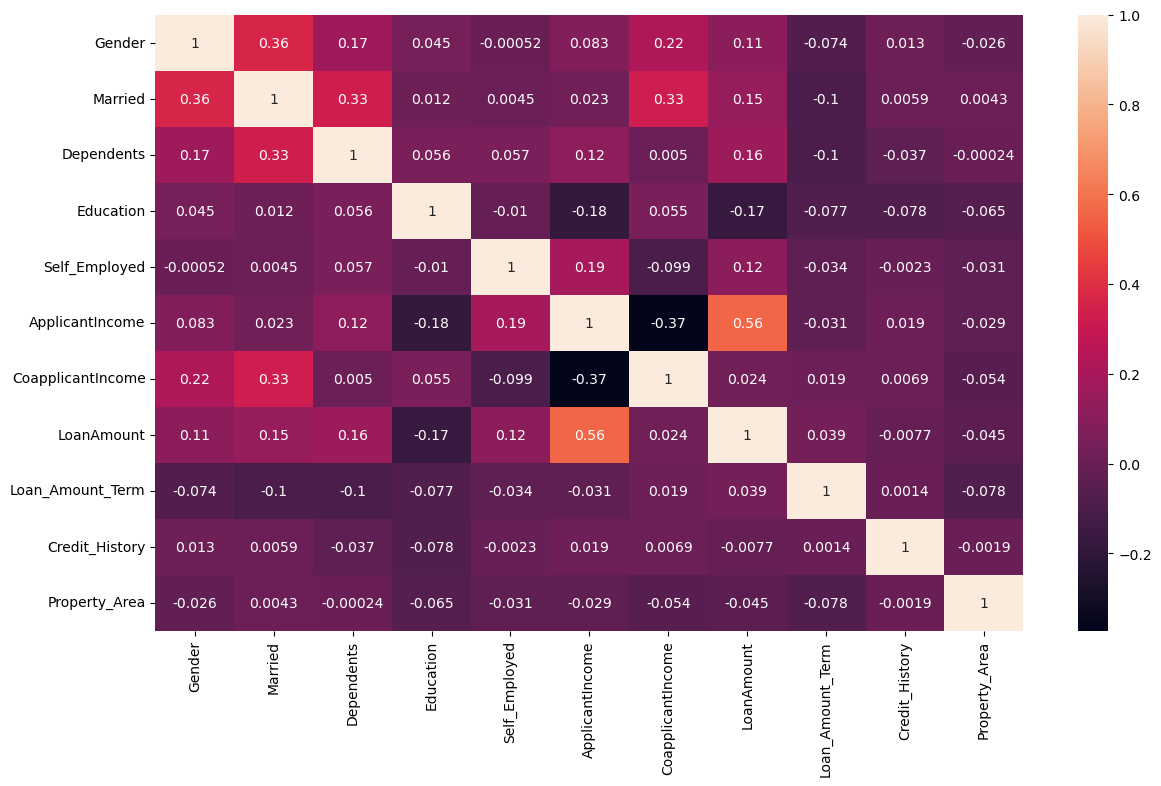

In [68]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(),annot = True, annot_kws = {'size':10})
plt.show()

In [69]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1.0,0.0,0.0,0.0,0.0,1.378864,0.000000,146.412162,360.0,1.0,2.0,Y
LP001003,1.0,1.0,1.0,0.0,0.0,1.366464,1.311350,128.000000,360.0,1.0,0.0,N
LP001005,1.0,1.0,0.0,0.0,1.0,1.345186,0.000000,66.000000,360.0,1.0,2.0,Y
LP001006,1.0,1.0,0.0,1.0,0.0,1.337750,1.333242,120.000000,360.0,1.0,2.0,Y
LP001008,1.0,0.0,0.0,0.0,0.0,1.380167,0.000000,141.000000,360.0,1.0,2.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0.0,0.0,0.0,0.0,0.0,1.343498,0.000000,71.000000,360.0,1.0,0.0,Y
LP002979,1.0,1.0,3.0,0.0,0.0,1.360913,0.000000,40.000000,180.0,1.0,0.0,Y
LP002983,1.0,1.0,1.0,0.0,0.0,1.395414,1.225056,253.000000,360.0,1.0,2.0,Y


### USING LABEL ENCODER FOR CONVERTING OUR TARGET FEATURE WHICH IS CATEGORICAL TO NUMERICAL 

In [73]:
le = LabelEncoder()
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1.0,0.0,0.0,0.0,0.0,1.378864,0.000000,146.412162,360.0,1.0,2.0,1
LP001003,1.0,1.0,1.0,0.0,0.0,1.366464,1.311350,128.000000,360.0,1.0,0.0,0
LP001005,1.0,1.0,0.0,0.0,1.0,1.345186,0.000000,66.000000,360.0,1.0,2.0,1
LP001006,1.0,1.0,0.0,1.0,0.0,1.337750,1.333242,120.000000,360.0,1.0,2.0,1
LP001008,1.0,0.0,0.0,0.0,0.0,1.380167,0.000000,141.000000,360.0,1.0,2.0,1


### SEPERATING TARGET AND FEATURE COLUMNS

In [74]:
X = df.drop('Loan_Status', axis=1)
Y = df['Loan_Status']

In [77]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [78]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [79]:
Y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [80]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.508819,-1.379156,-0.746208,-0.562203,-0.398126,0.529632,-1.111947,-0.005238,0.26536,0.605445,1.262010
1,0.508819,0.792459,0.278367,-0.562203,-0.398126,0.135598,0.941830,-0.230243,0.26536,0.605445,-1.333432
2,0.508819,0.792459,-0.746208,-0.562203,2.735689,-0.540526,-1.111947,-0.987911,0.26536,0.605445,1.262010
3,0.508819,0.792459,-0.746208,1.947553,-0.398126,-0.776802,0.976117,-0.328007,0.26536,0.605445,1.262010
4,0.508819,-1.379156,-0.746208,-0.562203,-0.398126,0.571014,-1.111947,-0.071377,0.26536,0.605445,1.262010


# Checking VIF(Variance Inflation Factor) values:

In [82]:
#importing VIF from statsmodels:

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Checking VIF
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.235882,Gender
1,1.384337,Married
2,1.170942,Dependents
3,1.091825,Education
4,1.054591,Self_Employed
5,1.988978,ApplicantIncome
6,1.499713,CoapplicantIncome
7,1.737076,LoanAmount
8,1.059550,Loan_Amount_Term
9,1.012023,Credit_History


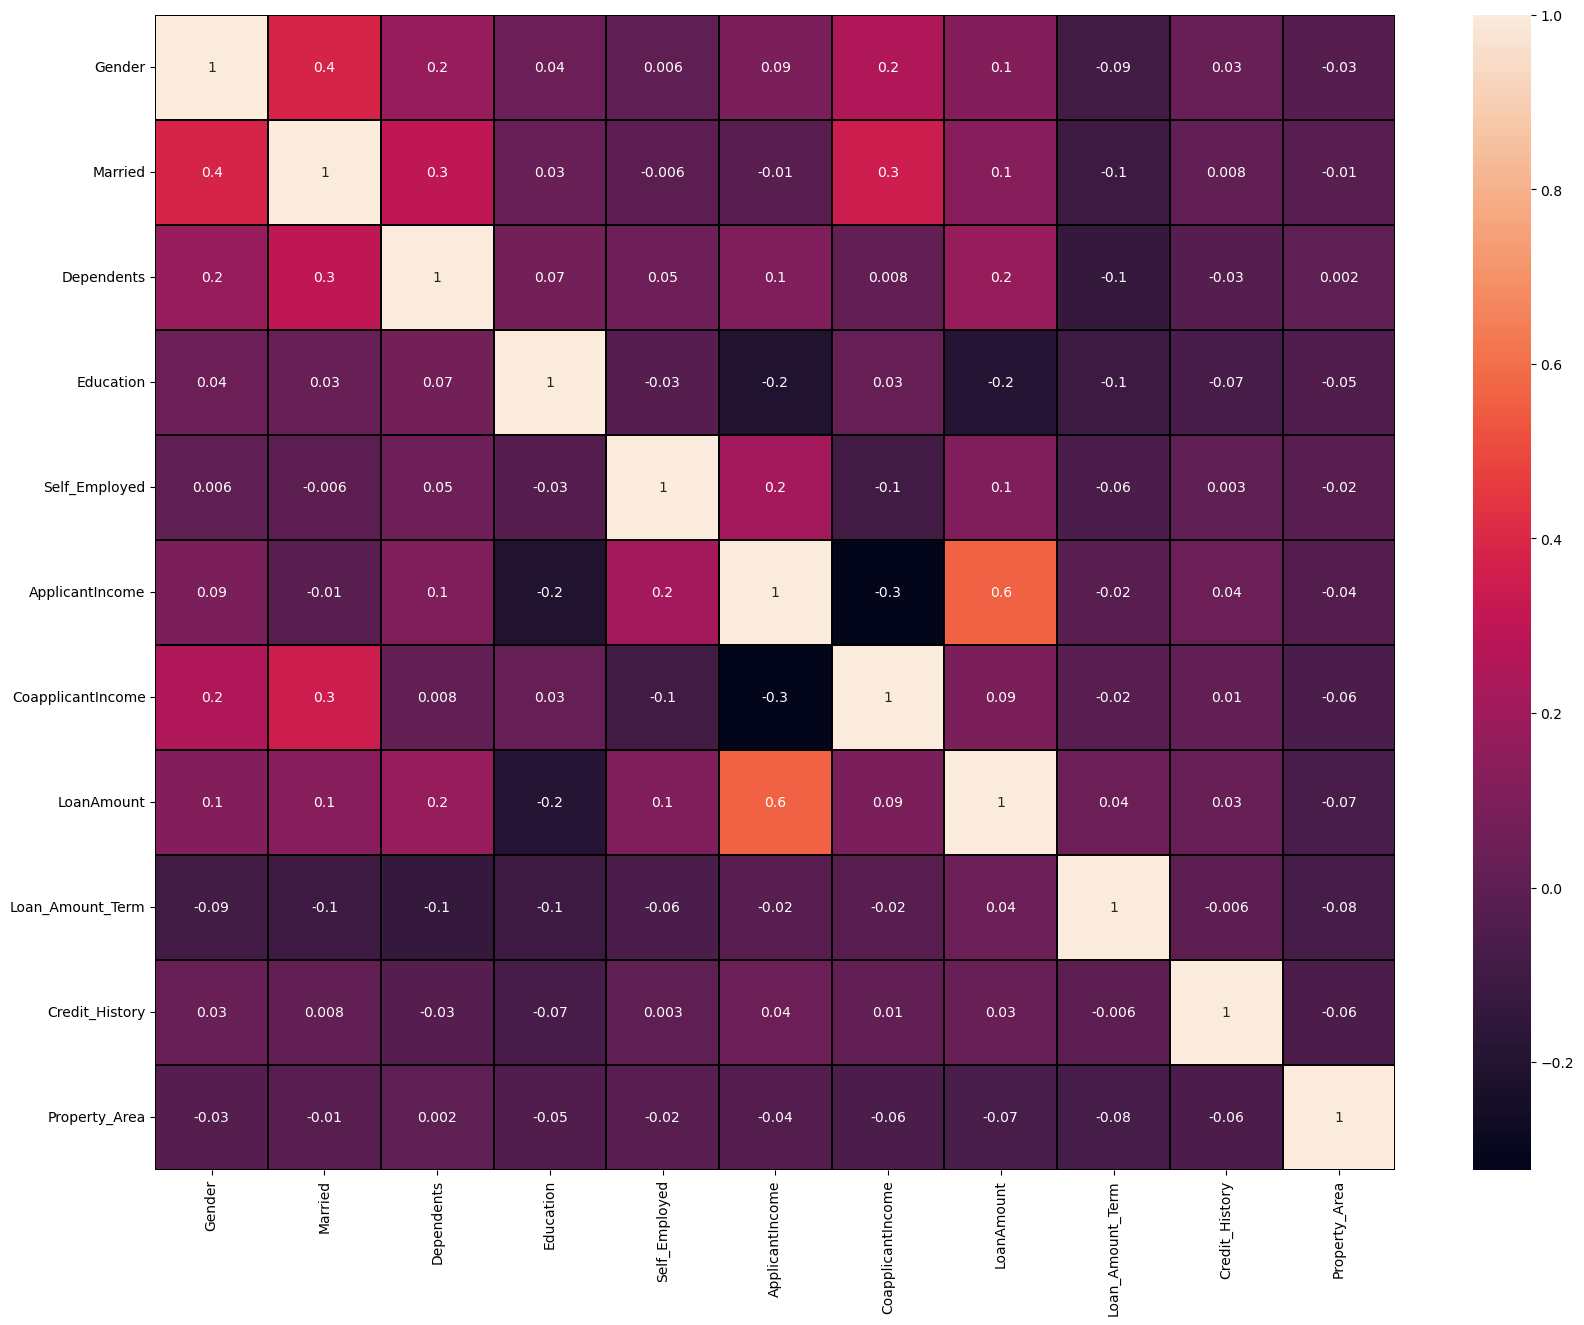

In [81]:
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(), linewidth=0.1,fmt=".1g",linecolor="black",annot=True)
plt.yticks(rotation=0);
plt.show()

# AS SEEN FROM THE VIF AND CORRELATION MATRIX GRAPH WE CAN SEE THE THE VALUES OF VIF IS LESS THAN 10 FOR ALL THE FEATURES THEREFORE THERE ARE NO STRONG CORRELATION BETWEEN THE FEATURES SO WE DONT NEED TO 

# MODELLING:-

In [83]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 82.46445497630332 on Random State 45


,Importance
Features,
Credit_History,0.306
ApplicantIncome,0.144
LoanAmount,0.140
CoapplicantIncome,0.117
Property_Area,0.074
Education,0.051
Dependents,0.049
Married,0.046
Loan_Amount_Term,0.030


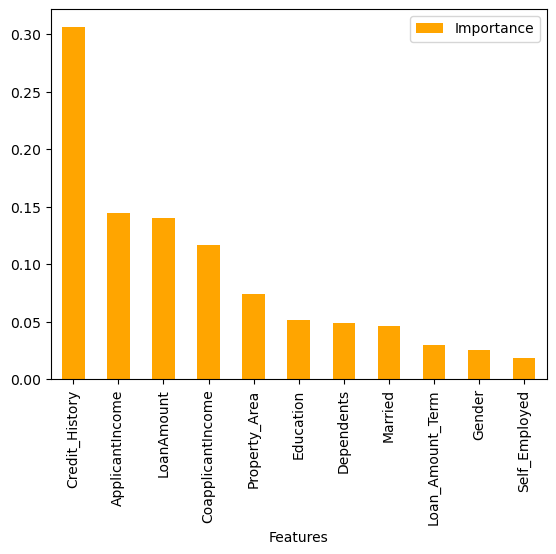

In [84]:
rf=RandomForestClassifier()

rf.fit(X_train, Y_train)

importance = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importance = importance.sort_values('Importance', ascending=False).set_index('Features')
importance.plot.bar(color='orange')
importance

In [86]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=112)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [87]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.60      0.69       104
           1       0.69      0.88      0.77       107

    accuracy                           0.74       211
   macro avg       0.76      0.74      0.73       211
weighted avg       0.76      0.74      0.73       211

Accuracy Score: 73.93364928909952
Cross Validation Score: 74.16877993801072

Accuracy Score - Cross Validation Score is -0.23513064891119484


In [88]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.61      0.68       104
           1       0.68      0.83      0.75       107

    accuracy                           0.72       211
   macro avg       0.73      0.72      0.72       211
weighted avg       0.73      0.72      0.72       211

Accuracy Score: 72.03791469194313
Cross Validation Score: 77.01676528599606

Accuracy Score - Cross Validation Score is -4.978850594052929


In [89]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       104
           1       0.77      0.76      0.76       107

    accuracy                           0.76       211
   macro avg       0.76      0.76      0.76       211
weighted avg       0.76      0.76      0.76       211

Accuracy Score: 76.30331753554502
Cross Validation Score: 79.51324316708931

Accuracy Score - Cross Validation Score is -3.2099256315442943


In [90]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       104
           1       0.80      0.88      0.84       107

    accuracy                           0.83       211
   macro avg       0.83      0.83      0.83       211
weighted avg       0.83      0.83      0.83       211

Accuracy Score: 82.93838862559242
Cross Validation Score: 84.37376725838264

Accuracy Score - Cross Validation Score is -1.4353786327902185


In [91]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.56      0.63       104
           1       0.65      0.79      0.71       107

    accuracy                           0.68       211
   macro avg       0.69      0.68      0.67       211
weighted avg       0.69      0.68      0.67       211

Accuracy Score: 67.77251184834124
Cross Validation Score: 72.985347985348

Accuracy Score - Cross Validation Score is -5.212836137006761


In [92]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       104
           1       0.79      0.83      0.81       107

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.81      0.81      0.81       211

Accuracy Score: 80.56872037914692
Cross Validation Score: 81.88433361510285

Accuracy Score - Cross Validation Score is -1.3156132359559223


# Hyper parameter tuning on the best Classification ML Model

In [93]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-4, -2, 0, 2],
              'random_state' : [77, 658, 789],
              'max_depth' : [0, 20, 40],
              'n_estimators' : [10, 20, 30]
             }

In [94]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=7)

In [95]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=7, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 20, 40], 'n_estimators': [10, 20, 30],
                         'n_jobs': [-4, -2, 0, 2],
                         'random_state': [77, 658, 789]})

In [96]:
print(GSCV.best_score_)
print(GSCV.best_estimator_)
print(GSCV.best_params_)

0.8279260422117565
ExtraTreesClassifier(max_depth=40, n_estimators=20, n_jobs=-4, random_state=658)
{'criterion': 'gini', 'max_depth': 40, 'n_estimators': 20, 'n_jobs': -4, 'random_state': 658}


In [98]:
Final_Model = ExtraTreesClassifier(criterion='entropy', max_depth=30, n_estimators=100, n_jobs=-2, random_state=1000)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 84.36018957345972


# AUC ROC CURVE

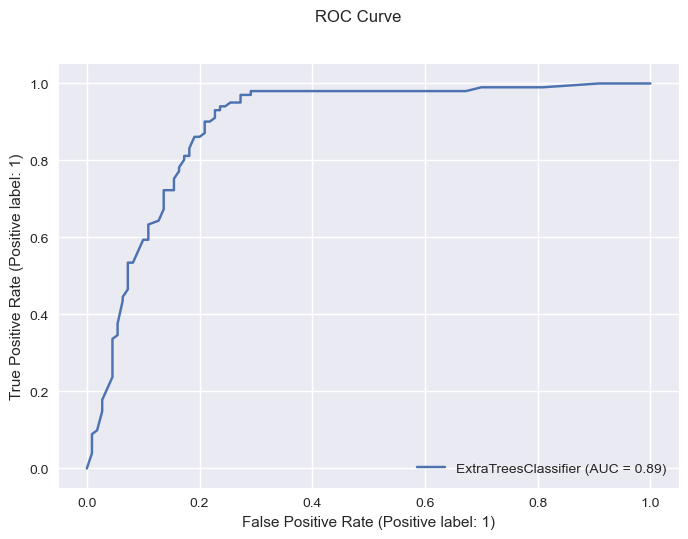

In [99]:
from sklearn import metrics

plt.style.use('seaborn')
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

# Confusion Matrix

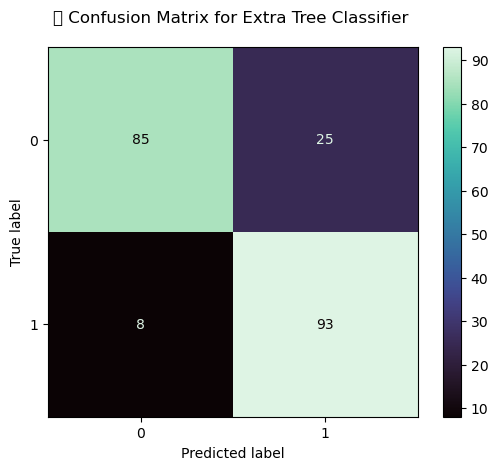

In [102]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Tree Classifier \n')
plt.show()

### The above confusion matrix gives me a clear idea about no. of correct outputs and no of incorrect outputs(ML missed to give the correct prediction which is seen in the black box)

# We have done the model with an accuracy score of 85%.